# Question 2:
* Which problems can be solved quickly but have not been solved?
* Can you pinpoint the reason why? 
* Note: Only for Bangkok

Interpresting which 'problems' as which 'types' of problems can be solved quickly but have not been solved, let's take a look at the cases of each type.

# Import Libraries

In [565]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Functions

In [566]:
import numpy as np
def makeList(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

# the_df.type = the_df.type.apply(makelist)
# the_df = the_df.explode('type')

In [567]:
import numpy as np
def makeList2(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split('/')
    else: return np.nan

In [568]:
import numpy as np
def makeList3(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split('-')
    else: return np.nan

In [569]:
import numpy as np
def stripSpace(x):
    if isinstance(x,str):
        return x.strip()
    else: return np.nan

In [570]:
# import requests
# def reverse_geocode(lat, lng, api_key):
#     # Base URL for the API
#     url = "https://maps.googleapis.com/maps/api/geocode/json"
    
#     # Parameters for the request
#     params = {
#         "latlng": f"{lat},{lng}",
#         "key": api_key
#     }
    
#     # Make the GET request
#     response = requests.get(url, params=params)
    
#     # Parse the JSON response
#     if response.status_code == 200:
#         data = response.json()
#         if data.get('results'):
#             return data['results'][0]['formatted_address']
#         else:
#             return "No address found for the given coordinates."
#     else:
#         return f"Error: {response.status_code}, {response.text}"

# # Example usage
# latitude = 100.48093
# longitude = 13.75001
# your_api_key = "YOUR_API_KEY"
# address = reverse_geocode(latitude, longitude, your_api_key)
# print(f"Address: {address}")

In [571]:
# import requests
# def get_location_from_coordinates(lat, lon):
#     url = f"https://nominatim.openstreetmap.org/reverse"
#     params = {
#         'lat': lat,
#         'lon': lon,
#         'format': 'json',
#     }
#     response = requests.get(url, params=params)
    
#     if response.status_code == 200:
#         data = response.json()
#         address = data.get("address", {})
#         region = address.get("state", "Region not found")
#         province = address.get("county", "Province not found")
#         return region, province
#     else:
#         return None, None

# # Example usage
# latitude = 100.5018
# longitude = 13.7563
# region, province = get_location_from_coordinates(latitude, longitude)
# print(f"Region: {region}, Province: {province}")


In [572]:
# import geopy
# from geopy.geocoders import Nominatim 
# import ssl
# import certifi
# from geopy.adapters import AioHTTPAdapter
# from geopy.geocoders import options
# def get_location_with_geopy(lat, lon):
#     ctx = ssl.create_default_context(cafile=certifi.where())
#     geopy.geocoders.options.default_ssl_context = ctx   
#     geolocator = Nominatim(user_agent="geoapi")
#     location = geolocator.reverse((lat, lon), language="en")
#     if location and location.raw.get("address"):
#         address = location.raw["address"]
#         region = address.get("state", "Region not found")
#         province = address.get("county", "Province not found")
#         return region, province
#     return None, None

# # Example usage
# latitude = 13.7563
# longitude = 100.5018 
# region, province = get_location_with_geopy(latitude, longitude)
# print(f"Region: {region}, Province: {province}")

# Consider by Types

### Exploding types

In [573]:
# combined_df = pd.read_csv('Combined_Cases_And_Logs.csv')
combined_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Bangkok.csv')

In [574]:
# combined_df['province'].value_counts()
combined_df_bkk['province'].value_counts()

province
กรุงเทพมหานคร    624020
Name: count, dtype: int64

In [575]:
# combined_df['province'].value_counts().reset_index().to_csv("combined_df['province'].value_counts().reset_index().csv", index=False)

In [576]:
# combined_df.shape
combined_df_bkk.shape

(624020, 17)

In [577]:
# combined_df.head()
combined_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00


In [578]:
# combined_df['type'].value_counts()
combined_df_bkk['type'].value_counts()

type
อื่นๆ                                             115756
ทางเท้า                                            93539
ผิดกฎจราจร                                         40009
จุดเสี่ยง,ความปลอดภัย                              34433
ถนน,ผิดกฎจราจร                                     29823
                                                   ...  
อื่นๆ,น้ำท่วม,คนเร่ร่อน                                1
ควันดำ,แท็กซี่/รถเมล์                                  1
ถนน ทางเท้า ที่จอดรถ,ทางเท้า,อาคารสถานที่ชำรุด         1
อื่นๆ,ควันดำ,สายสื่อสาร,ฝุ่นควัน&กลิ่น&PM2.5           1
ถนน,ความสะอาด,จุดเสี่ยง,ความปลอดภัย                    1
Name: count, Length: 982, dtype: int64

In [579]:
# combined_df[combined_df['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']
combined_df_bkk[combined_df_bkk['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"อื่นๆ,น้ำท่วม,คนเร่ร่อน","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [580]:
# combined_exploded_df = combined_df.copy()
combined_exploded_df_bkk = combined_df_bkk.copy()

In [581]:
# combined_exploded_df['type'] = combined_exploded_df['type'].apply(makeList)
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList)

In [582]:
# combined_exploded_df['type'].value_counts()
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]                                               115756
[ทางเท้า]                                              93539
[ผิดกฎจราจร]                                           40009
[จุดเสี่ยง, ความปลอดภัย]                               34433
[ถนน, ผิดกฎจราจร]                                      29823
                                                       ...  
[อื่นๆ, น้ำท่วม, คนเร่ร่อน]                                1
[ควันดำ, แท็กซี่/รถเมล์]                                   1
[ถนน ทางเท้า ที่จอดรถ, ทางเท้า, อาคารสถานที่ชำรุด]         1
[อื่นๆ, ควันดำ, สายสื่อสาร, ฝุ่นควัน&กลิ่น&PM2.5]          1
[ถนน, ความสะอาด, จุดเสี่ยง, ความปลอดภัย]                   1
Name: count, Length: 982, dtype: int64

In [583]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"[อื่นๆ, น้ำท่วม, คนเร่ร่อน]","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [584]:
# combined_exploded_df = combined_exploded_df.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

In [585]:
# combined_exploded_df.shape
combined_exploded_df_bkk.shape

(896289, 17)

makeList2 and makeList3 are added later due to some problems with 'type' not being all exploded.

In [586]:
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList2) 
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList3) 
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

In [587]:
# combined_exploded_df.head()
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
0,2024-ANZFC6,รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


In [588]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,อื่นๆ,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00
286899,2023-NUPL4X,น้ำท่วม,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00
286899,2023-NUPL4X,คนเร่ร่อน,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [589]:
# combined_exploded_df.to_csv('Combined_Cases_And_Logs_Exploded.csv', index=False)
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv', index=False)

### Categorizing types

Have to properly map and categorize types here first to prevent problems with findinf averages.

In [590]:
combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv')

In [591]:
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ANZFC6,รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


In [592]:
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                              202584
ผิดกฎจราจร                         102147
ทางเท้า                            100369
ความปลอดภัย                         70976
ถนน                                 59482
                                    ...  
อาคาร                                   1
ห้องน้ำคนพิการ                          1
ทางลาด                                  1
Public Event ขออนุญาตจัดกิจกรรม         1
แสงสว่าง                                1
Name: count, Length: 77, dtype: int64

In [593]:
combined_exploded_df_bkk['type'].nunique()

77

In [594]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ ', ' ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ & บัตรทอง', 'ถนน ทางเท้า ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ

In [595]:
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(stripSpace)

In [596]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ', 'ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ & บัตรทอง', 'ถนน ทางเท้า ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ',

In [597]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ถนน ทางเท้า ที่จอดรถ', 'type'] = 'ถนน&ทางเท้า&ที่จอดรถ'

In [598]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == '> ไฟดับ', 'type'] = 'ไฟดับ'

In [599]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'สุขภาพ & บัตรทอง', 'type'] = 'สุขภาพ&บัตรทอง'

In [600]:
combined_exploded_df_bkk['type'].unique()

array(['แท็กซี่', 'รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง', 'ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'ควันไฟ', 'ฝุ่นละออง', 'ยาเสพติด',
       'สุขภาพ&บัตรทอง', 'ถนน&ทางเท้า&ที่จอดรถ', 'ควันดำ',
       'ผู้พิการ+ใช้ล้อ', 'อัคคีภัย', 'ภัยจากการคมนาคมขนส่ง',
       'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'อุทกภัย', 'ไฟป่า', 'บริจาค',
       'ช่วยเหลือ', 'Public Event ขออนุญาตจัดกิจกรรม', 'ปัญหาสังคมอื่นๆ',
       'วินมอไซค์', 'ภัยทางถนน', 'ที่จอดรถ', 'ทางลาด', 'ห้องน้ำคนพิการ',
 

In [601]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'น้ำท่วม', 'type'] = 'อุทกภัย'

In [602]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทางลาด'])

In [603]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ผู้พิการ+ใช้ล้อ', 'type'] = 'ผู้พิการ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ห้องน้ำคนพิการ', 'type'] = 'ผู้พิการ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ทางลาด', 'type'] = 'ผู้พิการ'

In [604]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'BFMCC ขออนุญาตถ่ายทำภาพยนตร์', 'type'] = 'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'Public Event ขออนุญาตจัดกิจกรรม', 'type'] = 'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'

In [605]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'แสงสว่าง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ไฟฟ้า'])

In [606]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'แสงสว่าง', 'type'] = 'ไฟฟ้า'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ไฟดับ', 'type'] = 'ไฟฟ้า'

In [607]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ที่จอดรถ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ถนน'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทางเท้า'])

In [608]:
import numpy as np
def fixParkingRoadPavement(x):
    if x == 'ถนน&ทางเท้า&ที่จอดรถ':
        return x.split('&')
    elif isinstance(x,str):
        return x.split()
    else:
        return np.nan

In [609]:
combined_exploded_df_bkk.loc[:,'type'] = combined_exploded_df_bkk['type'].apply(fixParkingRoadPavement)

In [610]:
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]           202584
[ผิดกฎจราจร]      102147
[ทางเท้า]         100371
[ความปลอดภัย]      70976
[ถนน]              59484
                   ...  
[ภัยแล้ง]              1
[ด้านบริการ]           1
[อาคาร]                1
[อาคารสถานที่]         1
[ดินโคลนถล่ม]          1
Name: count, Length: 69, dtype: int64

In [611]:
combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type')

In [612]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อาคารสถานที่']['comment'].values)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อาคาร'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทรุด'])

In [613]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคารสถานที่ชำรุด', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคาร', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อาคารถล่ม', 'type'] = 'อาคารสถานที่'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ทรุด', 'type'] = 'อาคารสถานที่'

In [614]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ไฟป่า', 'type'] = 'อัคคีภัย'

In [615]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ควันไฟ'])

In [616]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ฝุ่นละออง', 'type'] = 'ฝุ่นควัน&กลิ่น&PM2.5'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ควันไฟ', 'type'] = 'ฝุ่นควัน&กลิ่น&PM2.5'

In [617]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'เบาะแสยาเสพติด', 'type'] = 'ยาเสพติด'

In [618]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'สถานบันเทิง']['comment'].values[7])

In [619]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประปาหัวแดง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ถังดับเพลิง'])

In [620]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ประปาหัวแดง', 'type'] = 'ประปาหัวแดง&ถังดับเพลิง'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ถังดับเพลิง', 'type'] = 'ประปาหัวแดง&ถังดับเพลิง'

In [621]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขยะ'].head())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'เผาในที่โล่ง'].head())
# Not the same

In [622]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วัสดุชำรุด'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อุปกรณ์ชำรุด'])

In [623]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วัสดุชำรุด', 'type'] = 'อุปกรณ์&วัสดุชำรุด'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'อุปกรณ์ชำรุด', 'type'] = 'อุปกรณ์&วัสดุชำรุด'

In [624]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ผิดกฎจราจร'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'แท็กซี่'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'รถเมล์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วินมอไซค์'])

In [625]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'แท็กซี่', 'type'] = 'ผิดกฎจราจร'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'รถเมล์', 'type'] = 'ผิดกฎจราจร'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วินมอไซค์', 'type'] = 'ผิดกฎจราจร'

In [626]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ป้ายโฆษณา'])

In [627]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ']['comment'].values[-3])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ']['comment'].values[11])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ'].shape)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ'].shape)
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'เสนอแนะ']['comment'].values[11])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประชาสัมพันธ์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ช่วยเหลือ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ด้านบริการ'])

In [628]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ขอใช้บริการ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ขอความช่วยเหลือ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'เสนอแนะ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ประชาสัมพันธ์', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ช่วยเหลือ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ด้านบริการ', 'type'] = 'ขอใช้บริการ&ขอความช่วยเหลือ'

In [629]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ประปา'])

In [630]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'จุดเสี่ยง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ความปลอดภัย'])
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'จุดเสี่ยง', 'type'] = 'จุดเสี่ยง&ความปลอดภัย'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ความปลอดภัย', 'type'] = 'จุดเสี่ยง&ความปลอดภัย'

In [631]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทุจริต']['comment'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'กรุงเทพโปร่งใส']['comment'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ทุจริต']['duration'].value_counts())
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'กรุงเทพโปร่งใส']['duration'].value_counts())
# The comment of these are all 'ไม่แสดงรายละเอียด', though they have different durations

In [632]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ชื่นชม'])

In [633]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'คุ้มครองผู้บริโภค'])

In [634]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยออนไลน์'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยอื่นๆ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยจากการคมนาคมขนส่ง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยทางถนน'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยแล้ง'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'วาตภัย'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'จุดอันตราย'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ภัยจากการก่อความไม่สงบ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ดินโคลนถล่ม'])

In [635]:
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'อื่นๆ'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'บริจาค'])
# display(combined_exploded_df_bkk[combined_exploded_df_bkk['type'] == 'ปัญหาสังคมอื่นๆ'])

In [636]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'บริจาค', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ปัญหาสังคมอื่นๆ', 'type'] = 'อื่นๆ'

In [637]:
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยออนไลน์', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยอื่นๆ', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยจากการคมนาคมขนส่ง', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยทางถนน', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยแล้ง', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'วาตภัย', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'จุดอันตราย', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ภัยจากการก่อความไม่สงบ', 'type'] = 'อื่นๆ'
combined_exploded_df_bkk.loc[combined_exploded_df_bkk['type'] == 'ดินโคลนถล่ม', 'type'] = 'อื่นๆ'

In [638]:
combined_exploded_df_bkk['type'].unique()

array(['ผิดกฎจราจร', 'ความสะอาด', 'เสียง', 'หาบเร่แผงลอย', 'อุทกภัย',
       'อื่นๆ', 'อุปกรณ์&วัสดุชำรุด', 'ถนน', 'คนเร่ร่อน', 'อาคารสถานที่',
       'ป้ายโฆษณา', 'ขอใช้บริการ&ขอความช่วยเหลือ', 'ไฟฟ้า', 'ทางเท้า',
       'ฝุ่นควัน&กลิ่น&PM2.5', 'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร',
       'อุบัติเหตุ', 'จุดเสี่ยง&ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'ยาเสพติด', 'ทุจริต', 'กรุงเทพโปร่งใส',
       'โรงเรียน', 'ชื่นชม', 'คุ้มครองผู้บริโภค',
       'ประปาหัวแดง&ถังดับเพลิง', 'สถานบันเทิง', 'สุขภาพ&บัตรทอง',
       'ที่จอดรถ', 'ควันดำ', 'ผู้พิการ', 'อัคคีภัย',
       'ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์'], dtype=object)

In [639]:
combined_exploded_df_bkk['type'].value_counts()

type
อื่นๆ                                   202831
จุดเสี่ยง&ความปลอดภัย                   113406
ผิดกฎจราจร                              105495
ทางเท้า                                 100544
ถนน                                      59657
ความสะอาด                                51171
ไฟฟ้า                                    44361
ต้นไม้                                   33463
อุทกภัย                                  27515
ฝุ่นควัน&กลิ่น&PM2.5                     26101
เสียง                                    23104
ขยะ                                      22006
ขอใช้บริการ&ขอความช่วยเหลือ              20619
อุปกรณ์&วัสดุชำรุด                       10200
สัตว์                                    10026
หาบเร่แผงลอย                              7423
กรุงเทพโปร่งใส                            7366
ทุจริต                                    7208
ป้ายโฆษณา                                 6016
อาคารสถานที่                              5852
คนเร่ร่อน                                 3773
ประปา   

In [640]:
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv', index=False)

### Finding average duration by type

In [641]:
# combined_exploded_df = pd.read_csv('Combined_Cases_And_Logs_Exploded.csv')
# combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv')
combined_exploded_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok_Categorized.csv')

In [642]:
# combined_exploded_df.shape
# combined_exploded_df_bkk.shape
combined_exploded_df_bkk_categorized.shape

(898197, 17)

In [643]:
# combined_exploded_df.isnull().sum()
# combined_exploded_df_bkk.isnull().sum()
combined_exploded_df_bkk_categorized.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      0
address                     0
subdistrict                 0
district                    0
province                    0
state                       0
star                   523684
count_reopen                0
last_activity               0
view_count                  0
timestamp_reported          0
timestamp_finish            0
duration                    0
dtype: int64

In [644]:
# combined_exploded_df.head()
# combined_exploded_df_bkk.head()
combined_exploded_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00


#### Creating duration_df

In [645]:
# combined_exploded_df['duration'] = pd.to_timedelta(combined_exploded_df['duration'])
# combined_exploded_df_bkk['duration'] = pd.to_timedelta(combined_exploded_df_bkk['duration'])
combined_exploded_df_bkk_categorized['duration'] = pd.to_timedelta(combined_exploded_df_bkk_categorized['duration'])

In [646]:
# combined_exploded_df['duration_int64'] = combined_exploded_df['duration'].astype(np.int64)
# combined_exploded_df_bkk['duration_int64'] = combined_exploded_df_bkk['duration'].astype(np.int64)
combined_exploded_df_bkk_categorized['duration_int64'] = combined_exploded_df_bkk_categorized['duration'].astype(np.int64)

In [647]:
# combined_exploded_df['duration_int64'].head()
# combined_exploded_df_bkk['duration_int64'].head()
combined_exploded_df_bkk_categorized['duration_int64'].head()

0    1800000000000
1    1800000000000
2    8520000000000
3    1140000000000
4    1560000000000
Name: duration_int64, dtype: int64

In [648]:
# combined_exploded_df.groupby('type')['duration_int64'].mean()
# combined_exploded_df_bkk.groupby('type')['duration_int64'].mean()
combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].mean()

type
กรุงเทพโปร่งใส                          5.751300e+15
ขยะ                                     1.626255e+15
ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์    1.279876e+15
ขอใช้บริการ&ขอความช่วยเหลือ             5.097094e+15
ขึ้นทะเบียน&สำรวจ                       2.767081e+15
คนเร่ร่อน                               1.317196e+15
ควันดำ                                  4.206329e+15
ความสะอาด                               1.348728e+15
คุ้มครองผู้บริโภค                       1.695158e+15
จุดเสี่ยง&ความปลอดภัย                   6.798756e+15
ชื่นชม                                  4.499096e+14
ต้นไม้                                  3.977522e+15
ถนน                                     4.755770e+15
ทางเท้า                                 4.060222e+15
ที่จอดรถ                                4.041512e+15
ทุจริต                                  5.644672e+15
ประปา                                   2.273302e+15
ประปาหัวแดง&ถังดับเพลิง                 1.807222e+15
ป้ายโฆษณา                               7

In [649]:
# duration_df = combined_exploded_df.groupby('type')['duration_int64'].mean().reset_index()
# duration_df_bkk = combined_exploded_df_bkk.groupby('type')['duration_int64'].mean().reset_index()
duration_df_bkk_categorized = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].mean().reset_index()

In [650]:
# duration_df.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)
# duration_df_bkk.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)
duration_df_bkk_categorized.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)

In [651]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64
0,กรุงเทพโปร่งใส,5.751300e+15
1,ขยะ,1.626255e+15
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15


In [652]:
# duration_df['duration_mean_int64'].astype('timedelta64[m]')
# duration_df_bkk['duration_mean_int64'].astype('timedelta64[m]')
duration_df_bkk_categorized['duration_mean_int64'].astype('timedelta64[m]')

0    3993958452122 days 08:44:00
1    1129343932715 days 07:41:00
2     888803030303 days 00:43:00
3    3539648635158 days 12:16:00
4    1921583992616 days 00:48:00
5     914719630709 days 10:14:00
6    2921061910377 days 08:36:00
7     936616895637 days 12:04:00
8    1177193333333 days 08:00:00
9    4721358495508 days 18:17:00
10    312437189054 days 17:26:00
11   2762168330195 days 12:57:00
12   3302617838225 days 04:30:00
13   2819598650010 days 14:37:00
14   2806605476190 days 11:25:00
15   3919911076812 days 19:13:00
16   1578681895184 days 13:04:00
17   1255015130353 days 19:37:00
18    542737332391 days 09:37:00
19   3798251656081 days 15:31:00
20   3850459915611 days 19:33:00
21   2137756019884 days 07:06:00
22   3702221915849 days 16:09:00
23   1523747580645 days 03:52:00
24   4049508881075 days 20:52:00
25   2638876364544 days 21:29:00
26   1585840608465 days 14:36:00
27    620851682832 days 15:17:00
28   2507468553459 days 02:52:00
29   3546559032524 days 11:50:00
30   42263

In [653]:
# duration_df['duration_mean_timedelta64[ns]'] = duration_df['duration_mean_int64'].astype('timedelta64[ns]')
# duration_df_bkk['duration_mean_timedelta64[ns]'] = duration_df_bkk['duration_mean_int64'].astype('timedelta64[ns]')
duration_df_bkk_categorized['duration_mean_timedelta64[ns]'] = duration_df_bkk_categorized['duration_mean_int64'].astype('timedelta64[ns]')

In [654]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088


In [655]:
# combined_exploded_df['duration_int64_logscale'] = combined_exploded_df['duration_int64'].apply(np.log)
# combined_exploded_df_bkk['duration_int64_logscale'] = combined_exploded_df_bkk['duration_int64'].apply(np.log)
combined_exploded_df_bkk_categorized['duration_int64_logscale'] = combined_exploded_df_bkk_categorized['duration_int64'].apply(np.log)

In [656]:
# combined_exploded_df.head()
# combined_exploded_df_bkk.head()
combined_exploded_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration,duration_int64,duration_int64_logscale
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00,1800000000000,28.218808
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00,1800000000000,28.218808
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00,8520000000000,29.773437
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00,1140000000000,27.762049
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00,1560000000000,28.075707


In [657]:
# temp_logscale_mean = combined_exploded_df.groupby('type')['duration_int64_logscale'].mean().reset_index()
# temp_logscale_mean = combined_exploded_df_bkk.groupby('type')['duration_int64_logscale'].mean().reset_index()
temp_logscale_mean = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64_logscale'].mean().reset_index()

In [658]:
temp_logscale_mean.rename(columns={'duration_int64_logscale':'duration_mean_int64_logscale'}, inplace=True)

In [659]:
temp_logscale_mean

,type,duration_mean_int64_logscale
0,กรุงเทพโปร่งใส,34.668155
1,ขยะ,33.193146
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,33.943274
3,ขอใช้บริการ&ขอความช่วยเหลือ,34.105964
4,ขึ้นทะเบียน&สำรวจ,33.755129
5,คนเร่ร่อน,33.147985
6,ควันดำ,34.430724
7,ความสะอาด,33.088456
8,คุ้มครองผู้บริโภค,34.045174
9,จุดเสี่ยง&ความปลอดภัย,34.644084


In [660]:
temp_logscale_mean['duration_mean_int64_logscale_expback'] = temp_logscale_mean['duration_mean_int64_logscale'].apply(np.exp)

In [661]:
# temp_logscale_mean['duration_mean_timedelta64[ns]_logscale'] = temp_logscale_mean['duration_mean_int64_logscale'].astype('timedelta64[ns]')
temp_logscale_mean['duration_mean_timedelta64[ns]_logscale_expback'] = temp_logscale_mean['duration_mean_int64_logscale_expback'].astype('timedelta64[ns]')

In [662]:
temp_logscale_mean

,type,duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback
0,กรุงเทพโปร่งใส,34.668155,1.138121e+15,13 days 04:08:40.878509701
1,ขยะ,33.193146,2.603756e+14,3 days 00:19:35.600019465
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,33.943274,5.512856e+14,6 days 09:08:05.574472959
3,ขอใช้บริการ&ขอความช่วยเหลือ,34.105964,6.486823e+14,7 days 12:11:22.316253615
4,ขึ้นทะเบียน&สำรวจ,33.755129,4.567370e+14,5 days 06:52:17.045375795
5,คนเร่ร่อน,33.147985,2.488784e+14,2 days 21:07:58.377731817
6,ควันดำ,34.430724,8.975802e+14,10 days 09:19:40.163695196
7,ความสะอาด,33.088456,2.344951e+14,2 days 17:08:15.071347040
8,คุ้มครองผู้บริโภค,34.045174,6.104236e+14,7 days 01:33:43.563208489
9,จุดเสี่ยง&ความปลอดภัย,34.644084,1.111052e+15,12 days 20:37:32.142632762


In [663]:
# duration_df = pd.merge(left=duration_df, right=temp_logscale_mean, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_logscale_mean, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_logscale_mean, how='left', on='type')

In [664]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795


In [665]:
# temp_median = combined_exploded_df.groupby('type')['duration_int64'].median().reset_index()
# temp_median = combined_exploded_df_bkk.groupby('type')['duration_int64'].median().reset_index()
temp_median = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].median().reset_index()

In [666]:
temp_median.head()

,type,duration_int64
0,กรุงเทพโปร่งใส,1.102350e+15
1,ขยะ,2.247600e+14
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,7.456800e+14
3,ขอใช้บริการ&ขอความช่วยเหลือ,6.091800e+14
4,ขึ้นทะเบียน&สำรวจ,4.385700e+14


In [667]:
temp_median.rename(columns={'duration_int64':'duration_median_int64'}, inplace=True)

In [668]:
# duration_df = pd.merge(left=duration_df, right=temp_median, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_median, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_median, how='left', on='type')

In [669]:
# duration_df['duration_median_timedelta64[ns]'] = duration_df['duration_median_int64'].astype('timedelta64[ns]')
# duration_df_bkk['duration_median_timedelta64[ns]'] = duration_df_bkk['duration_median_int64'].astype('timedelta64[ns]')
duration_df_bkk_categorized['duration_median_timedelta64[ns]'] = duration_df_bkk_categorized['duration_median_int64'].astype('timedelta64[ns]')

In [670]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959,7.456800e+14,8 days 15:08:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615,6.091800e+14,7 days 01:13:00
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795,4.385700e+14,5 days 01:49:30


In [671]:
# temp_mode = combined_exploded_df.groupby('type')['duration_int64'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else None
# ).reset_index()
# temp_mode = combined_exploded_df_bkk.groupby('type')['duration_int64'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else None
# ).reset_index()
temp_mode = combined_exploded_df_bkk_categorized.groupby('type')['duration_int64'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [672]:
temp_mode['duration_int64'].isnull().sum()

np.int64(0)

In [673]:
temp_mode.head()

,type,duration_int64
0,กรุงเทพโปร่งใส,89160000000000
1,ขยะ,10260000000000
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,10140000000000
3,ขอใช้บริการ&ขอความช่วยเหลือ,1260000000000
4,ขึ้นทะเบียน&สำรวจ,15660000000000


In [674]:
temp_mode.rename(columns={'duration_int64':'duration_mode_int64'}, inplace=True)

In [675]:
temp_mode['duration_mode_timedelta64[ns]'] = temp_mode['duration_mode_int64'].astype('timedelta64[ns]')

In [676]:
temp_mode.head()

,type,duration_mode_int64,duration_mode_timedelta64[ns]
0,กรุงเทพโปร่งใส,89160000000000,1 days 00:46:00
1,ขยะ,10260000000000,0 days 02:51:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,10140000000000,0 days 02:49:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,1260000000000,0 days 00:21:00
4,ขึ้นทะเบียน&สำรวจ,15660000000000,0 days 04:21:00


In [677]:
# duration_df = pd.merge(left=duration_df, right=temp_mode, how='left', on='type')
# duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_mode, how='left', on='type')
duration_df_bkk_categorized = pd.merge(left=duration_df_bkk_categorized, right=temp_mode, how='left', on='type')

In [678]:
# duration_df.head()
# duration_df_bkk.head()
duration_df_bkk_categorized.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,34.668155,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30,89160000000000,1 days 00:46:00
1,ขยะ,1.626255e+15,18 days 19:44:15.263110061,33.193146,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00,10260000000000,0 days 02:51:00
2,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,1.279876e+15,14 days 19:31:16.363636363,33.943274,5.512856e+14,6 days 09:08:05.574472959,7.456800e+14,8 days 15:08:00,10140000000000,0 days 02:49:00
3,ขอใช้บริการ&ขอความช่วยเหลือ,5.097094e+15,58 days 23:51:34.034628256,34.105964,6.486823e+14,7 days 12:11:22.316253615,6.091800e+14,7 days 01:13:00,1260000000000,0 days 00:21:00
4,ขึ้นทะเบียน&สำรวจ,2.767081e+15,32 days 00:38:00.949367088,33.755129,4.567370e+14,5 days 06:52:17.045375795,4.385700e+14,5 days 01:49:30,15660000000000,0 days 04:21:00


In [679]:
# duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']]
duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']]

,duration_mean_timedelta64[ns]_logscale_expback,duration_median_timedelta64[ns]
0,13 days 04:08:40.878509701,12 days 18:12:30
1,3 days 00:19:35.600019465,2 days 14:26:00
2,6 days 09:08:05.574472959,8 days 15:08:00
3,7 days 12:11:22.316253615,7 days 01:13:00
4,5 days 06:52:17.045375795,5 days 01:49:30
5,2 days 21:07:58.377731817,2 days 18:46:00
6,10 days 09:19:40.163695196,8 days 15:05:30
7,2 days 17:08:15.071347040,2 days 05:33:00
8,7 days 01:33:43.563208489,8 days 00:15:00
9,12 days 20:37:32.142632762,12 days 00:36:00


In [680]:
# duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].to_csv("duration_df_bkk[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].csv", index=False)
duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].to_csv("duration_df_bkk_categorized[['duration_mean_timedelta64[ns]_logscale_expback', 'duration_median_timedelta64[ns]']].csv", index=False)

In [681]:
# combined_exploded_averages_df = pd.merge(left=combined_exploded_df, right=duration_df, how='left', on='type')
# combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_df_bkk, right=duration_df_bkk, how='left', on='type')
combined_exploded_averages_df_bkk_categorized = pd.merge(left=combined_exploded_df_bkk_categorized, right=duration_df_bkk_categorized, how='left', on='type')

In [682]:
# combined_exploded_averages_df.head()
# combined_exploded_averages_df_bkk.head()
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,29.773437,1.348728e+15,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,27.762049,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,28.075707,2.732807e+15,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00


In [683]:
# combined_exploded_averages_df.to_csv('Combined_Cases_And_Logs_Exploded_Averages.csv', index=False)
# combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv', index=False)
combined_exploded_averages_df_bkk_categorized.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized.csv', index=False)

Now, we have a DataFrame with all the necessary central tendency measures for each type.

### Plot duration by type

#### Adjustments to DataFrame

In [684]:
# combined_exploded_averages_df = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages.csv')
# combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv')
combined_exploded_averages_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized.csv')

In [685]:
# combined_exploded_averages_df.head()
# combined_exploded_averages_df_bkk.head()
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,29.773437,1.348728e+15,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,27.762049,5.469482e+15,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,28.075707,2.732807e+15,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00


In [686]:
# combined_exploded_averages_df['type'].value_counts().reset_index()
# combined_exploded_averages_df_bkk['type'].value_counts().reset_index()
combined_exploded_averages_df_bkk_categorized['type'].value_counts().reset_index()

,type,count
0,อื่นๆ,202831
1,จุดเสี่ยง&ความปลอดภัย,113406
2,ผิดกฎจราจร,105495
3,ทางเท้า,100544
4,ถนน,59657
5,ความสะอาด,51171
6,ไฟฟ้า,44361
7,ต้นไม้,33463
8,อุทกภัย,27515
9,ฝุ่นควัน&กลิ่น&PM2.5,26101


In [687]:
# combined_exploded_averages_df['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df['type'].value_counts().csv", index=False)
# To see every case.

# combined_exploded_averages_df_bkk['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df_bkk['type'].value_counts().csv", index=False)
# To see every case.

# After categorizing by type, no need to to this for the new df anymore as all types can be seen.

In [688]:
# combined_exploded_averages_df['province'].value_counts().reset_index()
# combined_exploded_averages_df_bkk['province'].value_counts().reset_index()
combined_exploded_averages_df_bkk_categorized['province'].value_counts().reset_index()

,province,count
0,กรุงเทพมหานคร,898197


In statistics, sample size (n) should be larger than 30 to be 'sufficiently large' for central limit theoram to apply.

In [689]:
# combined_exploded_averages_df_bkk['type'] = combined_exploded_averages_df_bkk['type'].apply(makeList2) 
# combined_exploded_averages_df_bkk = combined_exploded_averages_df_bkk.explode('type')

# combined_exploded_averages_df_bkk['type'] = combined_exploded_averages_df_bkk['type'].apply(makeList3) 
# combined_exploded_averages_df_bkk = combined_exploded_averages_df_bkk.explode('type')

In [690]:
# type_count = combined_exploded_averages_df_bkk['type'].value_counts().reset_index()
type_count = combined_exploded_averages_df_bkk_categorized['type'].value_counts().reset_index()

In [691]:
type_count

,type,count
0,อื่นๆ,202831
1,จุดเสี่ยง&ความปลอดภัย,113406
2,ผิดกฎจราจร,105495
3,ทางเท้า,100544
4,ถนน,59657
5,ความสะอาด,51171
6,ไฟฟ้า,44361
7,ต้นไม้,33463
8,อุทกภัย,27515
9,ฝุ่นควัน&กลิ่น&PM2.5,26101


In [692]:
type_count[type_count['count'] >= 30]

,type,count
0,อื่นๆ,202831
1,จุดเสี่ยง&ความปลอดภัย,113406
2,ผิดกฎจราจร,105495
3,ทางเท้า,100544
4,ถนน,59657
5,ความสะอาด,51171
6,ไฟฟ้า,44361
7,ต้นไม้,33463
8,อุทกภัย,27515
9,ฝุ่นควัน&กลิ่น&PM2.5,26101


In [693]:
type_count[type_count['count'] < 30]

,type,count
37,ขออนุญาตจัดกิจกรรมหรือถ่ายทำภาพยนตร์,11


In [694]:
# combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_averages_df_bkk, right=type_count[type_count['count'] >= 30], how='left', on='type')
combined_exploded_averages_df_bkk_categorized = pd.merge(left=combined_exploded_averages_df_bkk_categorized, right=type_count[type_count['count'] >= 30], how='left', on='type')

In [695]:
# combined_exploded_averages_df_bkk['count'].isnull().sum()
combined_exploded_averages_df_bkk_categorized['count'].isnull().sum() #these are the ones with count lower than 30

np.int64(11)

In [696]:
# combined_exploded_averages_df_bkk.dropna(subset=['count'], inplace=True)
combined_exploded_averages_df_bkk_categorized.dropna(subset=['count'], inplace=True)

In [697]:
# combined_exploded_averages_df_bkk['count'].isnull().sum()
combined_exploded_averages_df_bkk_categorized['count'].isnull().sum()

np.int64(0)

In [698]:
# combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv', index=False)
combined_exploded_averages_df_bkk_categorized.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Plot.csv', index=False)

#### Plot duration for each case by type

In [699]:
# combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv')
combined_exploded_averages_df_bkk_categorized = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Categorized_Plot.csv')

In [700]:
# type_list = combined_exploded_averages_df_bkk['type'].unique()
type_list = combined_exploded_averages_df_bkk_categorized['type'].unique()

In [701]:
type_list

array(['ผิดกฎจราจร', 'ความสะอาด', 'เสียง', 'หาบเร่แผงลอย', 'อุทกภัย',
       'อื่นๆ', 'อุปกรณ์&วัสดุชำรุด', 'ถนน', 'คนเร่ร่อน', 'อาคารสถานที่',
       'ป้ายโฆษณา', 'ขอใช้บริการ&ขอความช่วยเหลือ', 'ไฟฟ้า', 'ทางเท้า',
       'ฝุ่นควัน&กลิ่น&PM2.5', 'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร',
       'อุบัติเหตุ', 'จุดเสี่ยง&ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'ยาเสพติด', 'ทุจริต', 'กรุงเทพโปร่งใส',
       'โรงเรียน', 'ชื่นชม', 'คุ้มครองผู้บริโภค',
       'ประปาหัวแดง&ถังดับเพลิง', 'สถานบันเทิง', 'สุขภาพ&บัตรทอง',
       'ที่จอดรถ', 'ควันดำ', 'ผู้พิการ', 'อัคคีภัย'], dtype=object)

In [702]:
for i in type_list:
    print("'" + i + "'" + ":")

'ผิดกฎจราจร':
'ความสะอาด':
'เสียง':
'หาบเร่แผงลอย':
'อุทกภัย':
'อื่นๆ':
'อุปกรณ์&วัสดุชำรุด':
'ถนน':
'คนเร่ร่อน':
'อาคารสถานที่':
'ป้ายโฆษณา':
'ขอใช้บริการ&ขอความช่วยเหลือ':
'ไฟฟ้า':
'ทางเท้า':
'ฝุ่นควัน&กลิ่น&PM2.5':
'สัตว์':
'ประปา':
'ต้นไม้':
'สายสื่อสาร':
'อุบัติเหตุ':
'จุดเสี่ยง&ความปลอดภัย':
'เผาในที่โล่ง':
'ขยะ':
'ขึ้นทะเบียน&สำรวจ':
'ยาเสพติด':
'ทุจริต':
'กรุงเทพโปร่งใส':
'โรงเรียน':
'ชื่นชม':
'คุ้มครองผู้บริโภค':
'ประปาหัวแดง&ถังดับเพลิง':
'สถานบันเทิง':
'สุขภาพ&บัตรทอง':
'ที่จอดรถ':
'ควันดำ':
'ผู้พิการ':
'อัคคีภัย':


Since Thai words cannot be displayed for plots, will have to change the 'type' column to English words.

In [707]:
# type_mapper = {
#     'แท็กซี่/รถเมล์': 'Taxi/Bus',
#     'ความสะอาด': 'Cleanliness',
#     'ผิดกฎจราจร': 'Breaking Traffic Rule',
#     'เสียง': 'Noise',
#     'หาบเร่แผงลอย': 'Hawker stall',
#     'น้ำท่วม': 'Flood 1',
#     'อื่นๆ': 'Others 1',
#     'อุปกรณ์ชำรุด': 'Defective equipment',
#     'ถนน': 'Road',
#     'คนเร่ร่อน': 'Homeless',
#     'อาคารสถานที่ชำรุด': 'Damaged building',
#     'ป้ายโฆษณา': 'Billboard',
#     'ขอใช้บริการ': 'Request for service',
#     'ไฟฟ้า': 'Electricity',
#     'ทางเท้า': 'Pavement',
#     'ฝุ่นควัน&กลิ่น&PM2.5': 'Dust, Smoke, Smell, and PM2.5',
#     'ขอความช่วยเหลือ': 'Request for assistance',
#     'สัตว์': 'Animal',
#     'ประปา': 'Plumbing',
#     'ต้นไม้': 'Tree',
#     'สายสื่อสาร': 'Communication line',
#     'อุบัติเหตุ': 'Accident',
#     'จุดเสี่ยง': 'Possible risk',
#     'ความปลอดภัย': 'Safety',
#     'เผาในที่โล่ง': 'Open Burning',
#     'ขยะ': 'Garbage',
#     'ขึ้นทะเบียน&สำรวจ': 'Registration and Survey',
#     'เสนอแนะ': 'Recommendation',
#     'ประชาสัมพันธ์': 'Announcement',
#     'เบาะแสยาเสพติด': 'Drug lead',
#     'ทุจริต': 'Corruption',
#     'กรุงเทพโปร่งใส': 'Anti-corruption',
#     'โรงเรียน': 'School',
#     'ชื่นชม': 'Praise',
#     'คุ้มครองผู้บริโภค': 'Customer protection',
#     'ภัยออนไลน์': 'Cyber hazard',
#     'ถังดับเพลิง/ประปาหัวแดง': 'Fire extinguisher/hydrant',
#     'ภัยอื่นๆ': 'Others 2',
#     'สถานบันเทิง': 'Entertainment venue',
#     'สุขภาพ & บัตรทอง': 'Health and Gold card',
#     'ถนน ทางเท้า ที่จอดรถ': 'Road-Pavement-Parking Slot',
#     'ควันดำ': 'Black Smoke',
#     'ผู้พิการ+ใช้ล้อ': 'Disabled (and using wheelchair)',
#     'อุทกภัย': 'Flood 2',
#     'ไฟป่า': 'Forest fire',
#     'วินมอไซค์': 'Motorbike taxi',
# }

type_mapper =    {
    'ผิดกฎจราจร': 'Traffic violations',
    'ความสะอาด': 'Cleanliness',
    'เสียง': 'Noise',
    'หาบเร่แผงลอย': 'Street vendors',
    'อุทกภัย': 'Floods',
    'อื่นๆ': 'Others',
    'อุปกรณ์&วัสดุชำรุด': 'Broken equipment & materials',
    'ถนน': 'Roads',
    'คนเร่ร่อน': 'Homeless people',
    'อาคารสถานที่': 'Buildings and facilities',
    'ป้ายโฆษณา': 'Billboards',
    'ขอใช้บริการ&ขอความช่วยเหลือ': 'Request for services & assistance',
    'ไฟฟ้า': 'Electricity',
    'ทางเท้า': 'Sidewalks',
    'ฝุ่นควัน&กลิ่น&PM2.5': 'Dust, odor, & PM2.5',
    'สัตว์': 'Animals',
    'ประปา': 'Waterworks',
    'ต้นไม้': 'Trees',
    'สายสื่อสาร': 'Communication cables',
    'อุบัติเหตุ': 'Accidents',
    'จุดเสี่ยง&ความปลอดภัย': 'Risk areas & safety',
    'เผาในที่โล่ง': 'Open burning',
    'ขยะ': 'Garbage',
    'ขึ้นทะเบียน&สำรวจ': 'Registration & surveys',
    'ยาเสพติด': 'Illegal Drugs',
    'ทุจริต': 'Corruption',
    'กรุงเทพโปร่งใส': 'Transparent Bangkok',
    'โรงเรียน': 'Schools',
    'ชื่นชม': 'Compliments',
    'คุ้มครองผู้บริโภค': 'Consumer protection',
    'ประปาหัวแดง&ถังดับเพลิง': 'Red fire hydrants & fire extinguishers',
    'สถานบันเทิง': 'Entertainment venues',
    'สุขภาพ&บัตรทอง': 'Health & Gold Card',
    'ที่จอดรถ': 'Parking spaces',
    'ควันดำ': 'Black smoke',
    'ผู้พิการ': 'Disabled individuals',
    'อัคคีภัย': 'Fires'
}


In [708]:
# combined_exploded_averages_df_bkk['type_eng'] = combined_exploded_averages_df_bkk['type'].map(type_mapper)
combined_exploded_averages_df_bkk_categorized['type_eng'] = combined_exploded_averages_df_bkk_categorized['type'].map(type_mapper)

In [710]:
combined_exploded_averages_df_bkk_categorized.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_int64_logscale_expback,duration_mean_timedelta64[ns]_logscale_expback,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns],count,type_eng
0,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
1,2024-ANZFC6,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
2,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,15 days 14:38:48.329718004,33.088456,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00,51171.0,Cleanliness
3,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,63 days 07:18:02.384757571,34.203191,7.149198e+14,8 days 06:35:19.770534300,6.015600e+14,6 days 23:06:00,3780000000000,0 days 01:03:00,105495.0,Traffic violations
4,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,31 days 15:06:46.610110803,34.109787,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00,23104.0,Noise


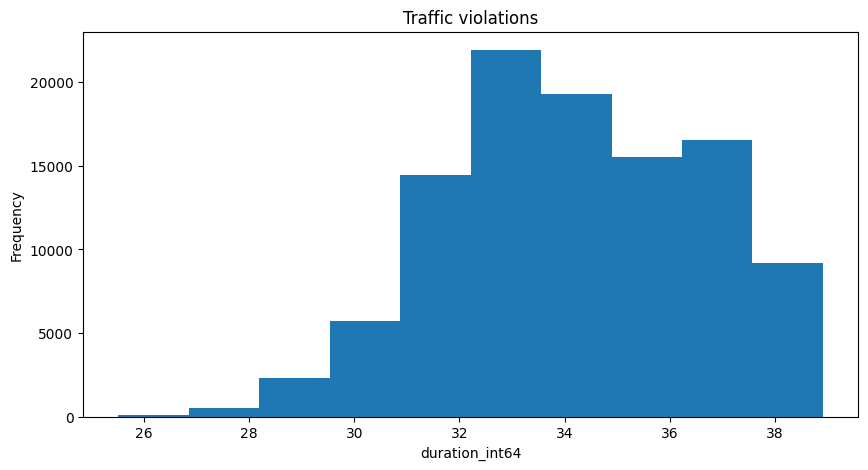

In [714]:
# for i in type_list:
#     combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64'].plot(kind='hist', title=type_mapper[i], figsize=(10, 5), xlabel='duration_int64')
#     # print(i)
#     break

for i in type_mapper.values():
    combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'].plot(kind='hist', title=i, figsize=(10, 5), xlabel='duration_int64')
    # print(i)
    break

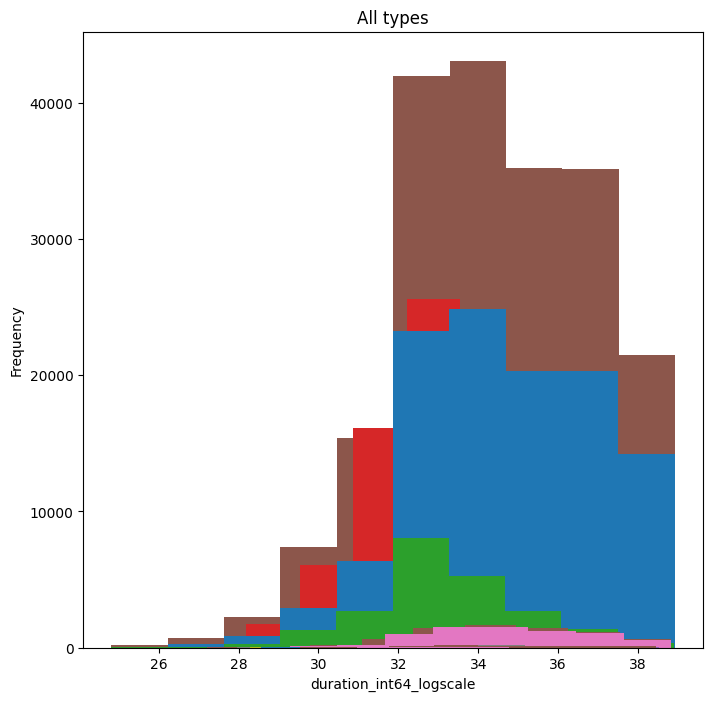

In [713]:
# for i in type_list:
#     fig = combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale'].plot(kind='hist', figsize=(8, 8), xlabel='duration_int64_logscale')
#     # print(i)
#     # break
# fig.set_title('All types')
# plt.show()

for i in type_mapper.values():
    fig = combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == i]['duration_int64_logscale'].plot(kind='hist', figsize=(8, 8), xlabel='duration_int64_logscale')
    # print(i)
    # break
fig.set_title('All types')
plt.show()

In [109]:
# for i in type_list:
#     plt.figure(figsize=(4, 4))
#     combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale'].plot(kind='hist', title=type_mapper[i], figsize=(4, 4), xlabel='duration_int64_logscale') 

# This works but the plots are too separated

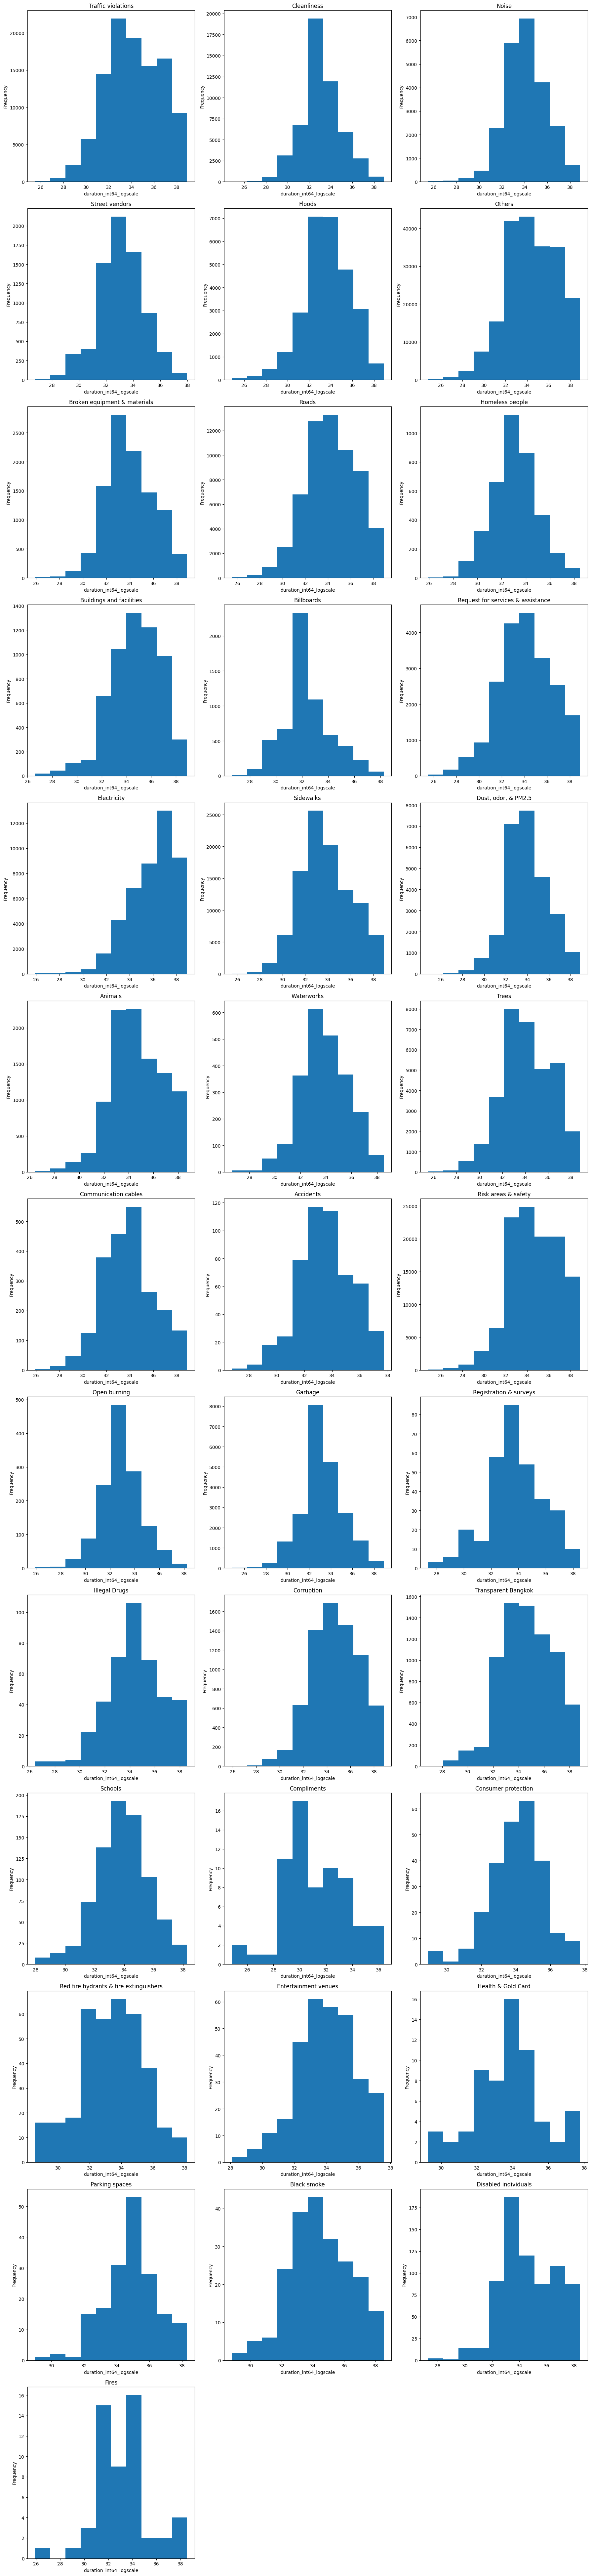

In [715]:
figures_per_row = 3 # Number of figures per row
num_figures = len(type_list)
num_rows = (num_figures + figures_per_row - 1) // figures_per_row  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, figures_per_row, figsize=(figures_per_row * 6, num_rows * 6))
axes = axes.flatten()  # Flatten axes array to make it easier to index

# Plot each figure
# for idx, i in enumerate(type_list):
#     ax = axes[idx]
#     data = combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale']
#     data.plot(kind='hist', ax=ax, title=type_mapper[i], xlabel='duration_int64_logscale')
for idx, i in enumerate(type_list):
    ax = axes[idx]
    data = combined_exploded_averages_df_bkk_categorized[combined_exploded_averages_df_bkk_categorized['type_eng'] == type_mapper[i]]['duration_int64_logscale']
    data.plot(kind='hist', ax=ax, title=type_mapper[i], xlabel='duration_int64_logscale')

# Hide any unused subplots
for idx in range(num_figures, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

From the visualisation, it can been seen that most types have normal-ish distribution (with the use of logscale as well).

However, the following look a bit skewed: Traffic violions, Others, ELectricity, Animals, Risk areas & Safety.

### Finding cases that takes too long to solve

From previously, electricity and possible risk are the two most skewed types.

Let's now then find the amount of cases the have the log_scale duration longer than the log_scale mean. 

Here, the ASSUMPTION is that the cases that exceeds the log_scale mean are the ones that take too long to solve and should be improved.

NOTE: The log_scale mean of duration is chosen over median of duration because the mean considers all values in dataset, not just the middle value. These numbers are very similar for most types, but there are also some big differences in a few types.

In [3]:
combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv')

In [4]:
combined_exploded_averages_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns],count
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,28.218808,2.688940e+15,31 days 02:55:39.810218978,4.243139e+14,4 days 21:51:53.876192293,3.985800e+14,4 days 14:43:00,3780000000000,0 days 01:03:00,1370.0
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,29.773437,1.348728e+15,15 days 14:38:48.329718004,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00,51171.0
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,27.762049,5.547520e+15,64 days 04:58:39.896619578,7.256029e+14,8 days 09:33:22.914968887,6.078600e+14,7 days 00:51:00,5520000000000,0 days 01:32:00,102147.0
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,28.075707,2.732807e+15,31 days 15:06:46.610110803,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00,23104.0
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,...,30.298249,8.940264e+14,10 days 08:20:26.423278997,2.489583e+14,2 days 21:09:18.329546155,2.487000e+14,2 days 21:05:00,94320000000000,1 days 02:12:00,7423.0


In [27]:
combined_exploded_averages_df_bkk.columns

Index(['ticket_id', 'type', 'organization_action', 'comment', 'coords',
       'address', 'subdistrict', 'district', 'province', 'state', 'star',
       'count_reopen', 'last_activity', 'view_count', 'timestamp_reported',
       'timestamp_finish', 'duration', 'duration_int64',
       'duration_int64_logscale', 'duration_mean_int64',
       'duration_mean_timedelta64[ns]', 'duration_mean_int64_logscale',
       'duration_mean_timedelta64[ns]_logscale', 'duration_median_int64',
       'duration_median_timedelta64[ns]', 'duration_mode_int64',
       'duration_mode_timedelta64[ns]', 'count'],
      dtype='object')

In [28]:
combined_exploded_averages_df_bkk[['type', 'duration', 'duration_int64', 'duration_int64_logscale', 'duration_mean_int64_logscale']]

,type,duration,duration_int64,duration_int64_logscale,duration_mean_int64_logscale
0,แท็กซี่/รถเมล์,0 days 00:30:00,1800000000000,28.218808,4.243139e+14
1,ความสะอาด,0 days 02:22:00,8520000000000,29.773437,2.344951e+14
2,ผิดกฎจราจร,0 days 00:19:00,1140000000000,27.762049,7.256029e+14
3,เสียง,0 days 00:26:00,1560000000000,28.075707,6.511666e+14
4,หาบเร่แผงลอย,0 days 04:00:00,14400000000000,30.298249,2.489583e+14
...,...,...,...,...,...
896191,อื่นๆ,892 days 12:02:00,77112120000000000,38.884037,8.792246e+14
896192,เสียง,892 days 12:02:00,77112120000000000,38.884037,6.511666e+14
896193,ขยะ,653 days 15:18:00,56474280000000000,38.572562,2.603756e+14
896194,ความสะอาด,653 days 15:18:00,56474280000000000,38.572562,2.344951e+14


In [10]:
combined_exploded_averages_df_bkk['duration_int64_logscale'].head()

0    28.218808
1    29.773437
2    27.762049
3    28.075707
4    30.298249
Name: duration_int64_logscale, dtype: float64

In [8]:
combined_exploded_averages_df_bkk['duration_mean_int64_logscale'].head()

0    4.243139e+14
1    2.344951e+14
2    7.256029e+14
3    6.511666e+14
4    2.489583e+14
Name: duration_mean_int64_logscale, dtype: float64

In [18]:
(combined_exploded_averages_df_bkk['duration_mean_int64_logscale'] - combined_exploded_averages_df_bkk['duration_int64_logscale']).astype('timedelta64[ns]') 

0            4 days 21:21:53.876192293
1            2 days 14:46:15.071347040
2            8 days 09:14:22.914968887
3            7 days 12:26:46.554736235
4            2 days 17:09:18.329546155
                      ...             
896191   -883 days +16:11:44.649319216
896192   -885 days +00:50:46.554736240
896193   -651 days +09:01:35.600019464
896194   -651 days +01:50:15.071347040
896195   -644 days +14:21:44.649319224
Length: 896196, dtype: timedelta64[ns]

In [19]:
((combined_exploded_averages_df_bkk['duration_mean_int64_logscale'] - combined_exploded_averages_df_bkk['duration_int64_logscale']) < 0).sum()

np.int64(0)

# Other Stuff 2